## Computing co-occurence matrix

In [8]:
import os
if(not os.getcwd().endswith("crchum")):
    os.chdir("..")
os.getcwd()

'/Users/antoinemagron/Documents/EPFL/PDM/crchum'

In [37]:
import pandas as pd
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import networkx as nx

corpora = pd.read_csv("docs/v1_v2_template.csv")

In [10]:
def preprocessing(corpus):
    # initialize
    clean_text = []

    for row in corpus:
        # tokenize
        tokens = nltk.tokenize.word_tokenize(row)
        # lowercase
        tokens = [token.lower() for token in tokens]
        # isword
        tokens = [token for token in tokens if token.isalpha()]
        clean_sentence = ''
        clean_sentence = ' '.join(token for token in tokens)
        clean_text.append(clean_sentence)
        
    return clean_text

# sklearn countvectorizer
def get_co_occ_mat(text):
    # Convert a collection of text documents to a matrix of token counts
    cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')
    # matrix of token counts
    X = cv.fit_transform(text)
    Xc = (X.T * X) # matrix manipulation
    Xc.setdiag(0) # set the diagonals to be zeroes as it's pointless to be 1
    names = cv.get_feature_names_out() # This are the entity names (i.e. keywords)
    return pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

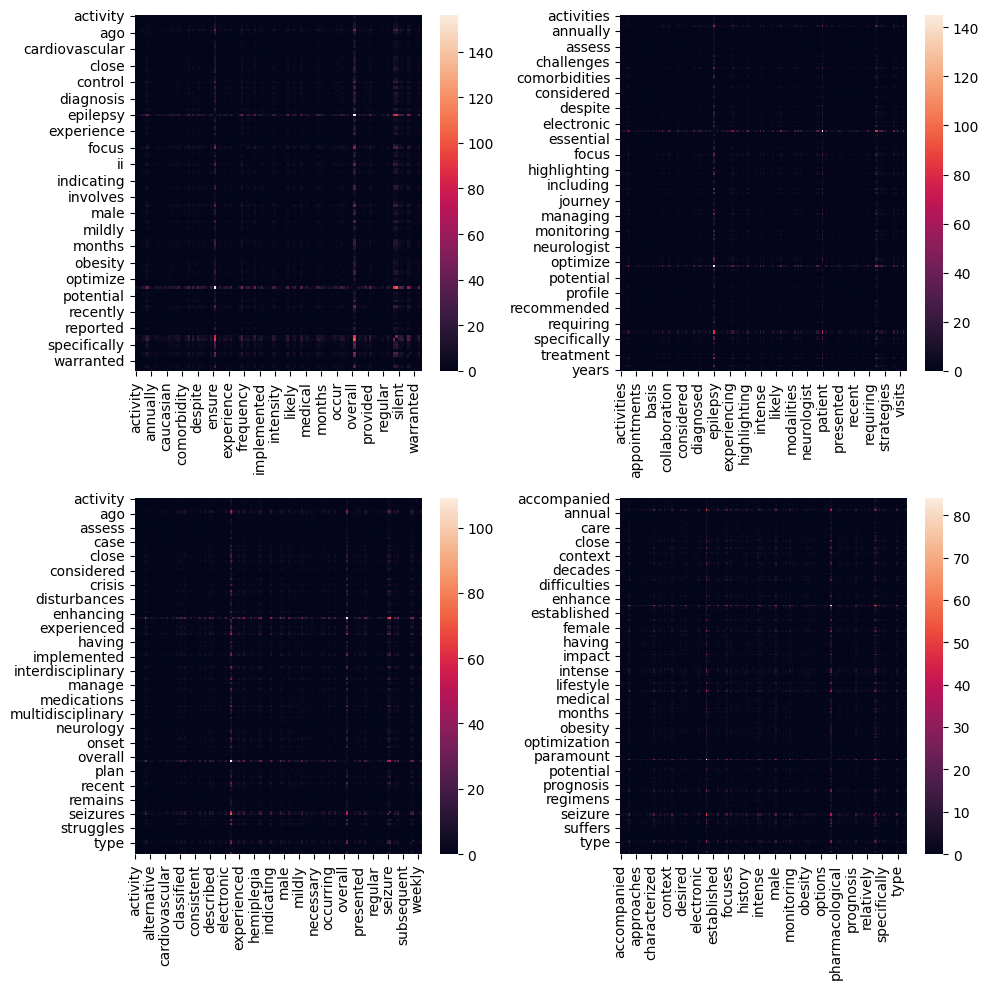

In [21]:
f, axs = plt.subplots(2, 2, figsize=(10, 10))
for ax, t in zip(axs.flatten(), [.5, .8, 1, 1.4]):
    sns.heatmap(get_co_occ_mat(preprocessing(corpus=list(corpora[f"sdehr_{t}"].values))), ax=ax)


plt.tight_layout()

In [56]:
epio = pd.read_csv("docs/EPIO.csv")[["Preferred Label", "Synonyms", "Definitions"]]
cooc = get_co_occ_mat(preprocessing(corpus=list(corpora[f"sdehr_1"].values)))

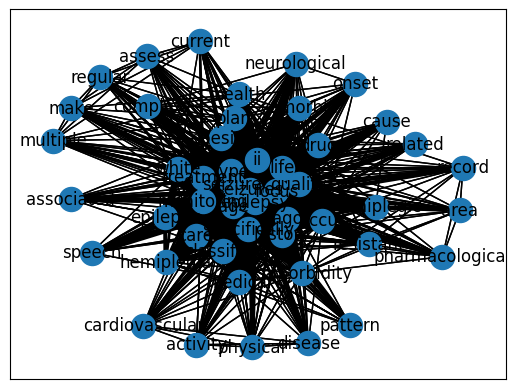

In [57]:
G = nx.from_pandas_adjacency(cooc[
    cooc.reset_index()["index"].apply(
        lambda x : any(x in y for y in epio["Preferred Label"])
    ).values
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])

In [61]:
[print(_) for _ in cooc.index];

activity
additionally
address
adequately
adjusting
adjustments
age
ago
albeit
alternative
annually
approach
approximately
area
assess
associated
basis
battle
cardiovascular
care
carefully
case
categorized
caucasian
cause
challenging
characterized
classified
close
comorbid
comorbidities
comorbidity
complex
comprehensive
condition
considered
consistent
continued
continues
control
controlled
crises
crisis
current
date
described
despite
diagnosed
disease
disturbances
documented
drug
effectively
effectiveness
electronic
eloquent
enhancing
ensure
epilepsy
epileptic
episode
episodes
essential
experienced
experiencing
female
focus
focusing
frequency
frequent
having
health
hemiplegia
hemiplegic
highlights
history
ii
implemented
improve
improving
include
indicating
intense
intensity
interdisciplinary
interventions
involves
journey
life
make
male
manage
manageable
management
managing
manifestations
meaning
medical
medications
mildly
minimize
monitoring
month
monthly
months
multidisciplinary
multi

In [68]:
drugcooc = cooc.loc["drug"]
drugcooc[drugcooc > 0].head(40)

additionally      1
address           1
adjusting         1
adjustments       1
age               3
ago               2
annually          1
associated        1
basis             1
care              1
case              1
caucasian         2
challenging       2
classified        2
close             2
comorbid          1
comorbidities     2
complex           1
comprehensive     1
condition         2
continues         1
control           2
crisis            1
described         2
documented        1
eloquent          1
ensure            1
epilepsy         12
epileptic         1
episode           1
essential         3
experienced       2
experiencing      1
female            1
focus             5
having            1
hemiplegia        1
history           3
ii                5
implemented       1
Name: drug, dtype: int64